<a href="https://colab.research.google.com/github/David-Adeleye/David-Adeleye/blob/main/NBA%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EDA of NBA dataset

Name

Date

In [1]:
# import necessary libraries
import pandas as pd

In [2]:
#read in the dataset
nba_df = pd.read_csv("/content/NBA_2024_per_game(11-10-2023 Updated).csv")
nba_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Joel Embiid,C,29,PHI,7,7,33.6,11.3,21.3,0.530,...,0.844,2.3,8.6,10.9,5.9,0.7,2.3,3.7,2.4,31.7
1,Devin Booker,SG,27,PHO,2,2,36.0,11.5,20.0,0.575,...,1.000,1.0,6.5,7.5,10.5,0.5,0.0,5.5,4.0,31.5
2,Luka Don?i?,PG,24,DAL,8,8,37.4,10.5,21.8,0.483,...,0.773,0.8,8.5,9.3,8.8,1.4,0.6,4.9,2.3,31.5
3,De'Aaron Fox,PG,26,SAC,3,3,35.3,11.3,23.3,0.486,...,0.810,1.0,3.3,4.3,6.0,1.3,0.7,2.7,4.0,31.3
4,Donovan Mitchell,SG,27,CLE,7,7,35.9,11.1,21.9,0.510,...,0.897,1.1,3.7,4.9,5.6,2.3,0.6,2.7,2.1,30.7


In [3]:
#
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  461 non-null    object 
 1   Pos     461 non-null    object 
 2   Age     461 non-null    int64  
 3   Tm      461 non-null    object 
 4   G       461 non-null    int64  
 5   GS      461 non-null    int64  
 6   MP      461 non-null    float64
 7   FG      461 non-null    float64
 8   FGA     461 non-null    float64
 9   FG%     448 non-null    float64
 10  3P      461 non-null    float64
 11  3PA     461 non-null    float64
 12  3P%     392 non-null    float64
 13  2P      461 non-null    float64
 14  2PA     461 non-null    float64
 15  2P%     434 non-null    float64
 16  eFG%    448 non-null    float64
 17  FT      461 non-null    float64
 18  FTA     461 non-null    float64
 19  FT%     372 non-null    float64
 20  ORB     461 non-null    float64
 21  DRB     461 non-null    float64
 22  TR

There are 29 features in the dataset. There are no null values. There are 461 rows of data. There are 3 data types - 23 float64, 3 int64 and 3 object.

In [8]:
nba_df["Player"] = nba_df["Player"].astype("string")
nba_df['Tm'] = nba_df['Tm'].astype("string")

print(nba_df.dtypes)

'''nba_df[["Player", "Tm"]] = nba_df[["Player", "Tm"]].astype("string")'''

Player     string
Pos        object
Age         int64
Tm         string
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object


In [13]:
nba_df[['Player', 'GS']]

,Player,GS
0,Joel Embiid,7
1,Devin Booker,2
2,Luka Don?i?,8
3,De'Aaron Fox,3
4,Donovan Mitchell,7
...,...,...
456,Jericho Sims,0
457,Ish Smith,0
458,Lindy Waters III,0
459,Jalen Wilson,0


In [16]:
games_played = nba_df.groupby('Player')['G'].sum(numeric_only=True)
games_played.head()

Player
A.J. Green       3
AJ Griffin       5
Aaron Gordon     9
Aaron Holiday    5
Aaron Nesmith    8
Name: G, dtype: int64

In [23]:
nba_df[["Player", "G"]].groupby("Player").sum(numeric_only = True).sort_values(by = "G", ascending =  False).head(10).reset_index()

,Player,G
0,Robert Covington,14
1,P.J. Tucker,12
2,KJ Martin,10
3,Nicolas Batum,10
4,DeMar DeRozan,9
5,Chris Paul,9
6,Marcus Sasser,9
7,Kelly Olynyk,9
8,Nikola Joki?,9
9,Torrey Craig,9


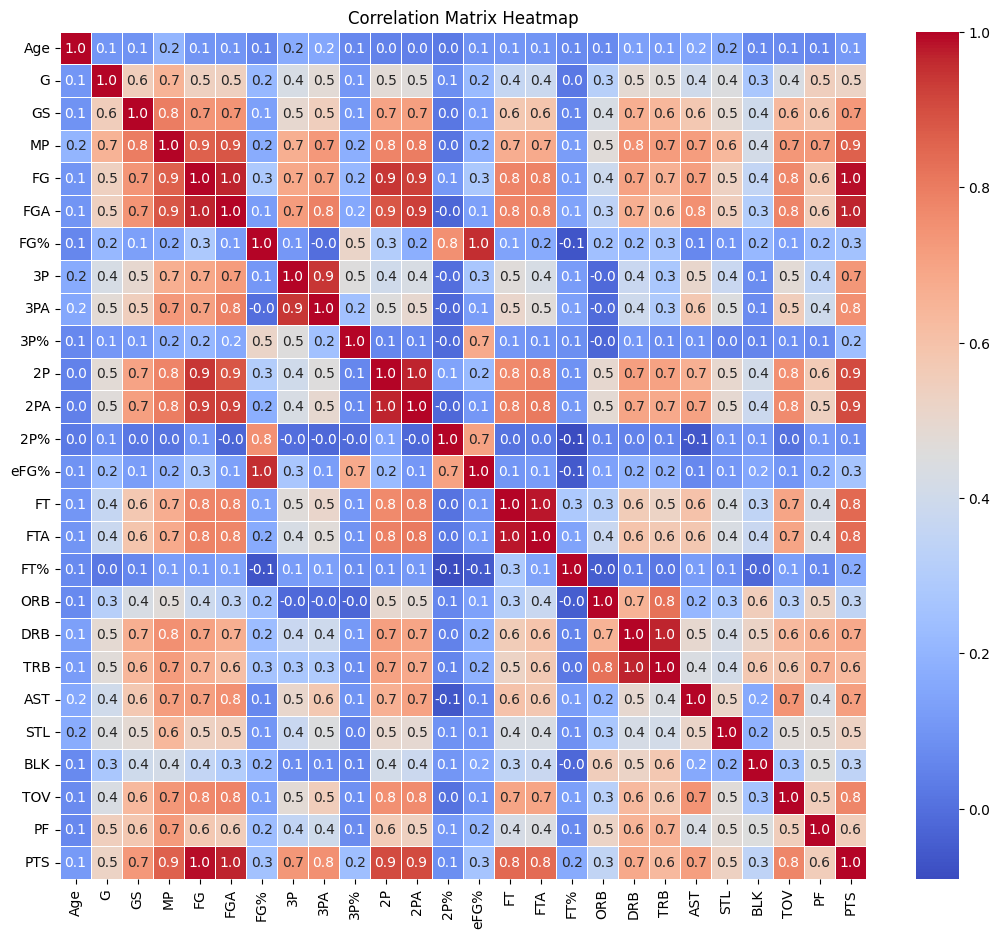

In [33]:
# Visualise the correlation of the numeric columns
import numpy as np
import altair as alt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = nba_df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(13, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# Calculate the correlation matrix
corr_matrix = nba_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

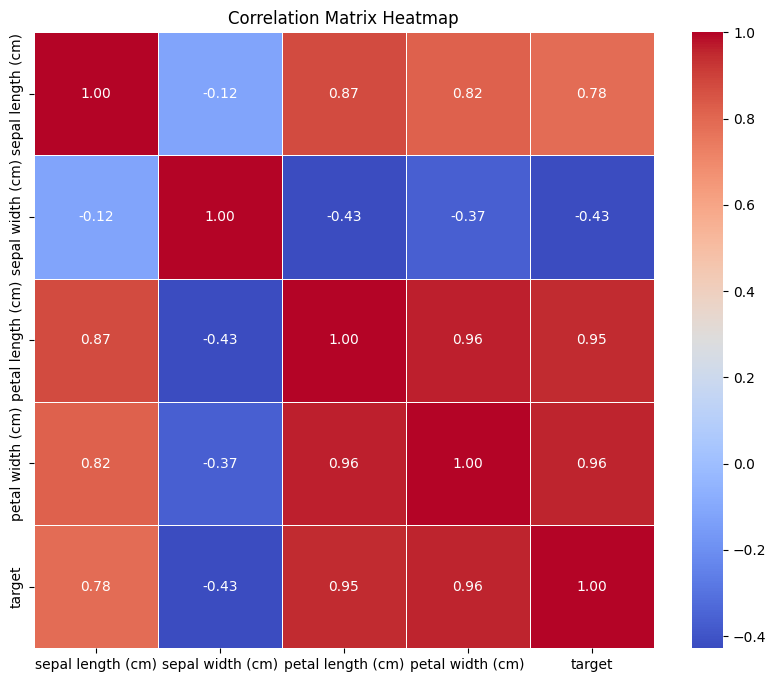

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset for illustration
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [29]:
# Calculate the correlation between target and other features
target_correlation = iris_df.corr()['target'].drop('target')
print(target_correlation)


sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
Name: target, dtype: float64


In [30]:
# Calculate the correlation between target and other features
target_correlation = iris_df.corr()['target']
print(target_correlation)


sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64
